# Analysis 3

In [320]:
import requests,json,os
import re,datetime
import shutil
import matplotlib.pyplot as mp
import pandas as pd
import numpy as np
import seaborn as sns

In [321]:
pl2015=pd.read_csv('../data/pl2015.csv')

In [322]:
home=pl2015.groupby('homeTeamName').sum()[['HST','FTHG']]
home.reset_index(level=(0), inplace=True)
home.rename(columns={'homeTeamName':'Team'}, inplace=True)
home['HomeChances']=home['HST']+home['FTHG']
home['%_convHome']=(home['FTHG']/home['HomeChances'])
home=home.sort_values(by=['%_convHome'], ascending=[False])
#home

In [323]:
away=pl2015.groupby('awayTeamName').sum()[['AST','FTAG']]
away.reset_index(level=(0), inplace=True)
away.rename(columns={'awayTeamName':'Team'}, inplace=True)
away['AwayChances']=away['AST']+away['FTAG']
away['%_convAway']=(away['FTAG']/away['AwayChances'])
away=away.sort_values(by=['%_convAway'], ascending=[False])
#away

In [324]:
PL=pd.merge(home, away, on=['Team'], how='inner')
PL['ToTchances']=PL['HomeChances']+PL['AwayChances']
PL['Converted']=PL['FTHG']+PL['FTAG']
PL['%_conv']=(PL['Converted']/PL['ToTchances'])
PL=PL.sort_values(by=['ToTchances'], ascending=[True])[['Team','ToTchances','Converted','%_conv']]
#PL.sort_values(by=['%_conv'], ascending=[False])[['Team','ToTchances','Converted','%_conv']]

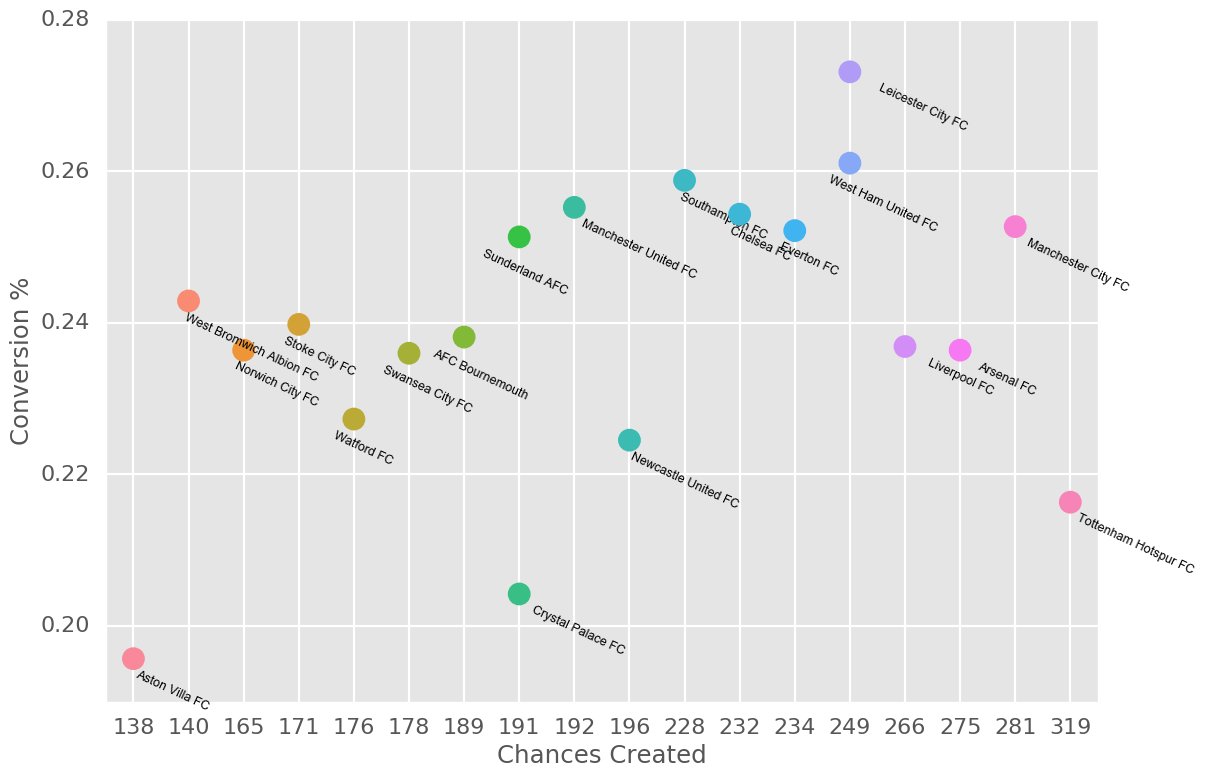

In [325]:
ax=sns.pointplot(x=PL['ToTchances'], y=PL['%_conv'], hue=PL['Team'])
ax.legend_.remove()
ax.grid(True)
i=0
for L, x, y in zip(PL['Team'], PL['ToTchances'], PL['%_conv']):
    ax.text(i*.899, (y-0.0025), L,color='Black', fontsize=9,
        horizontalalignment='left',rotation=-25)
    i+=1

mp.ylabel('Conversion %')
mp.xlabel('Chances Created')
mp.show()

In [326]:
# ax.text(0, (0.195652-0.0035), 'Aston Villa FC',color='Black', fontsize=10)
# ax.text(1, (0.204188-0.0035), 'Crystal Palace FC',color='Black', fontsize=10)
# ax.text(2, (0.216301-0.0035), 'Tottenham Hotspur FC',color='Black', fontsize=10)
# ax.text(3, (0.224490-0.0035), 'Newcastle United FC',color='Black', fontsize=10)
# ax.text(4, (0.227273-0.0035), 'Watford FC',color='Black', fontsize=10)
# ax.text(5, (0.235955-0.0035), 'Swansea City FC',color='Black', fontsize=10)
# ax.text(6, (0.236364-0.0035), 'Arsenal FC',color='Black', fontsize=10)
# ax.text(7, (0.236364-0.0035), 'Norwich City FC',color='Black', fontsize=10)
# ax.text(8, (0.236842-0.0035), 'Liverpool FC',color='Black', fontsize=10)
# ax.text(9, (0.238095-0.0035), 'AFC Bournemouth',color='Black', fontsize=10)
# ax.text(10, (0.239766-0.0035), 'Stoke City FC',color='Black', fontsize=10)
# ax.text(11, (0.242857-0.0035), 'West Bromwich Albion FC',color='Black', fontsize=10)
# ax.text(12, (0.251309-0.0035), 'Sunderland AFC',color='Black', fontsize=10)
# ax.text(13, (0.252137-0.0035), 'Everton FC',color='Black', fontsize=10)
# ax.text(14, (0.252669-0.0035), 'Manchester City FC',color='Black', fontsize=10)
# ax.text(15, (0.254310-0.0035), 'Chelsea FC',color='Black', fontsize=10)
# ax.text(16, (0.255208-0.0035), 'Manchester United FC',color='Black', fontsize=10)
# ax.text(17, (0.258772-0.0035), 'Southampton FC',color='Black', fontsize=10)
# ax.text(18, (0.261044-0.0035), 'West Ham United FC',color='Black', fontsize=10)
# ax.text(19, (0.273092-0.0035), 'Leicester City FC',color='Black', fontsize=10)
